In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("data_cleaned.csv")

In [4]:
df.head()

,title,make,model,year,mileagekm,location,fueltype,registeredcity,color,enginecapacitycc,assembly,automatic,pricePKR,VXR,VXL
0,Toyota Corolla SE Saloon Automatic 2004,Toyota,Corolla,2004,186000,Husaini chowk Ranger market hasil pur road,Petrol,Karachi,White,1600.0,local,Automatic,120000.0,0,0
1,Toyota Corolla Altis Grande CVT-i 1.8 2016,Toyota,Corolla,2016,159000,unknownLocation,Petrol,Punjab,White,1800.0,local,Automatic,310000.0,0,0
2,Toyota Raize 2021,Toyota,Raize,2021,1700,189-B PakArab Society Ferozpur Road15-A Moulan...,Petrol,Un-Registered,Red,1000.0,Imported,Automatic,439500.0,0,0
3,Honda Civic VTi Oriel 1.6 2004,Honda,Civic,2004,285000,unknownLocation,Petrol,Sialkot,Grey,1600.0,local,unknown,137500.0,0,0
4,Toyota Vitz F 1.0 2018,Toyota,Vitz,2018,38000,Hockey Stadium Near Gourmet Bakery,Petrol,Lahore,White,1000.0,local,Automatic,275000.0,0,0


In [5]:
df.columns

Index(['title', 'make', 'model', 'year', 'mileagekm', 'location', 'fueltype',
       'registeredcity', 'color', 'enginecapacitycc', 'assembly', 'automatic',
       'pricePKR', 'VXR', 'VXL'],
      dtype='object')

# Firstly have correct data types

In [6]:
df.dtypes

title                object
make                 object
model                object
year                  int64
mileagekm             int64
location             object
fueltype             object
registeredcity       object
color                object
enginecapacitycc    float64
assembly             object
automatic            object
pricePKR            float64
VXR                   int64
VXL                   int64
dtype: object

In [7]:
df['pricePKR'] = np.floor(pd.to_numeric(df['pricePKR'], errors='coerce')).astype('Int64') 

In [8]:
df['enginecapacitycc'] = np.floor(pd.to_numeric(df['enginecapacitycc'], errors='coerce')).astype('Int64')

In [9]:
df.dtypes

title               object
make                object
model               object
year                 int64
mileagekm            int64
location            object
fueltype            object
registeredcity      object
color               object
enginecapacitycc     Int64
assembly            object
automatic           object
pricePKR             Int64
VXR                  int64
VXL                  int64
dtype: object

## Exploratory Data Analysis

In [10]:
df.describe()

,year,mileagekm,enginecapacitycc,pricePKR,VXR,VXL
count,451.000000,4.510000e+02,451.000000,4.510000e+02,451.000000,451.000000
mean,2014.055432,9.485396e+04,1439.113082,1.174800e+06,0.108647,0.044346
std,6.497797,1.318050e+05,630.515195,3.279697e+06,0.311542,0.206091
min,1981.000000,1.000000e+00,660.000000,2.500000e+04,0.000000,0.000000
25%,2010.000000,2.305650e+04,1000.000000,1.825000e+05,0.000000,0.000000
50%,2015.000000,7.730800e+04,1439.000000,3.400000e+05,0.000000,0.000000
75%,2019.000000,1.207515e+05,1550.000000,1.174800e+06,0.000000,0.000000
max,2022.000000,1.541112e+06,4600.000000,3.510000e+07,1.000000,1.000000


In [11]:
df.columns

Index(['title', 'make', 'model', 'year', 'mileagekm', 'location', 'fueltype',
       'registeredcity', 'color', 'enginecapacitycc', 'assembly', 'automatic',
       'pricePKR', 'VXR', 'VXL'],
      dtype='object')

<AxesSubplot:>

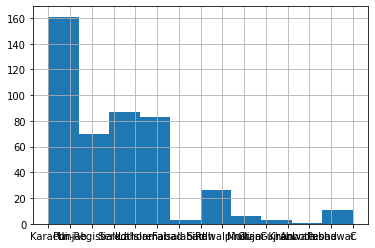

In [12]:
df.registeredcity.hist()

<AxesSubplot:>

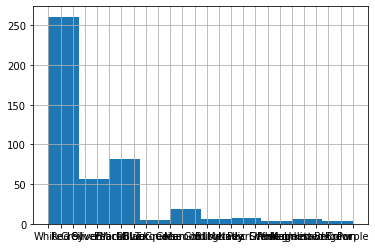

In [13]:
df.color.hist()

<AxesSubplot:>

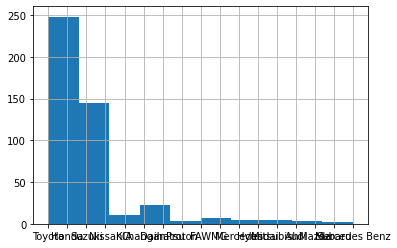

In [14]:
df.make.hist()

<AxesSubplot:>

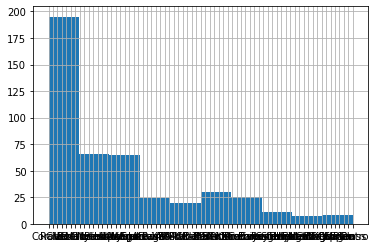

In [15]:
df['model'].hist()

<AxesSubplot:>

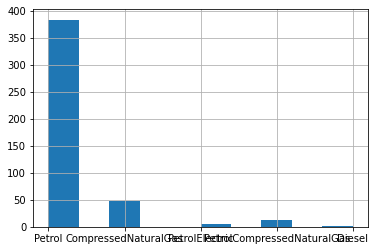

In [16]:
df.fueltype.hist()

<AxesSubplot:>

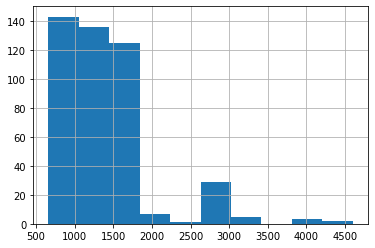

In [17]:
df.enginecapacitycc.hist()

<AxesSubplot:>

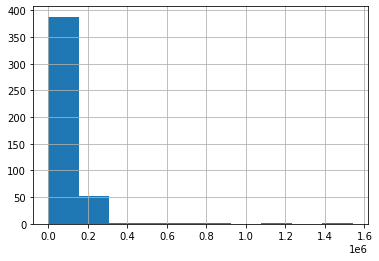

In [18]:
df.mileagekm.hist()

In [19]:
df.columns

Index(['title', 'make', 'model', 'year', 'mileagekm', 'location', 'fueltype',
       'registeredcity', 'color', 'enginecapacitycc', 'assembly', 'automatic',
       'pricePKR', 'VXR', 'VXL'],
      dtype='object')

<AxesSubplot:>

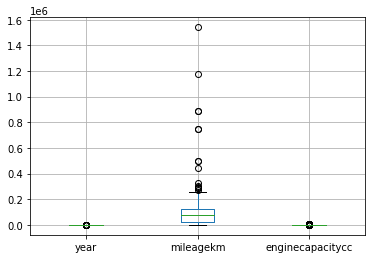

In [20]:
df.boxplot(column = ['year', 'mileagekm',
       'enginecapacitycc'])

<AxesSubplot:>

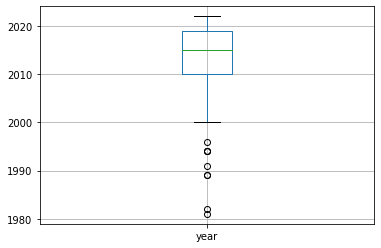

In [21]:
df.boxplot(column = 'year')

<AxesSubplot:>

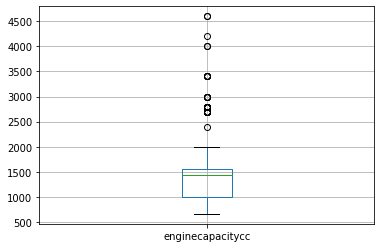

In [22]:
df.boxplot(column = 'enginecapacitycc')

In [23]:
df[['year', 'mileagekm','enginecapacitycc','pricePKR']].corr()

,year,mileagekm,enginecapacitycc,pricePKR
year,1.000000,-0.305242,-0.089213,0.088608
mileagekm,-0.305242,1.000000,0.065785,-0.059179
enginecapacitycc,-0.089213,0.065785,1.000000,0.424702
pricePKR,0.088608,-0.059179,0.424702,1.000000


<AxesSubplot:>

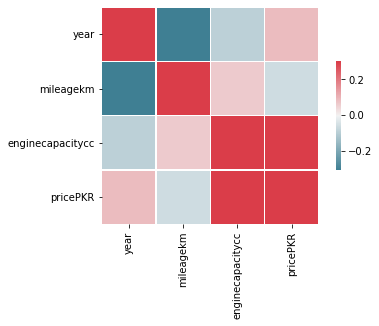

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['year', 'mileagekm','enginecapacitycc','pricePKR']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['title', 'make', 'model', 'year', 'mileagekm', 'location', 'fueltype',
       'registeredcity', 'color', 'enginecapacitycc', 'assembly', 'automatic',
       'pricePKR', 'VXR', 'VXL'],
      dtype='object')

In [26]:
df_discrete = df[['make', 'model', 'fueltype','registeredcity', 'color', 'assembly', 'automatic','VXR', 'VXL']]

graph for make: total = 17


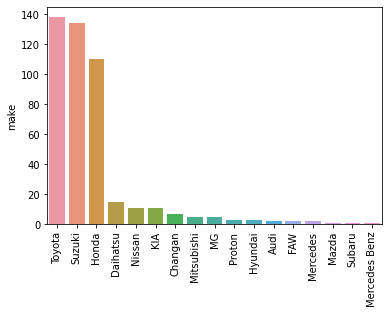

graph for model: total = 69


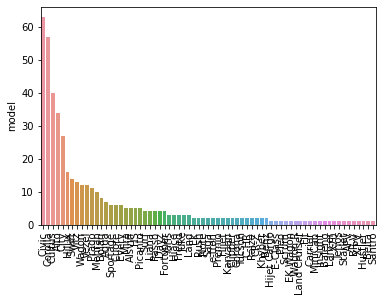

graph for fueltype: total = 5


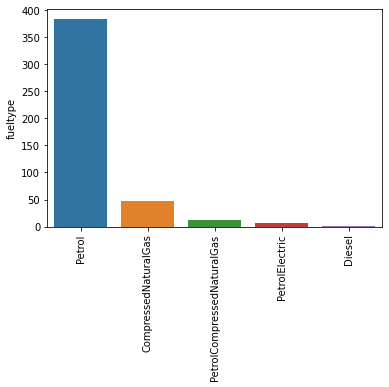

graph for registeredcity: total = 15


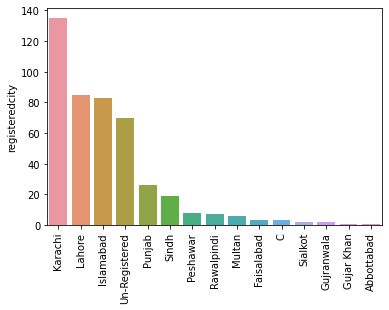

graph for color: total = 26


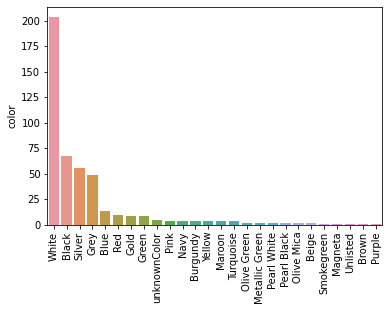

graph for assembly: total = 3


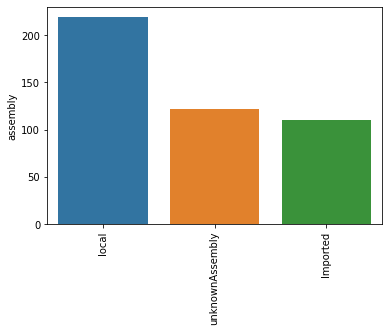

graph for automatic: total = 4


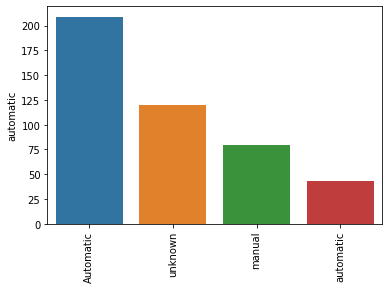

graph for VXR: total = 2


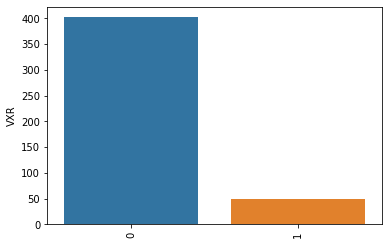

graph for VXL: total = 2


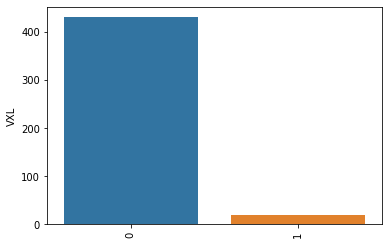

In [27]:
for i in df_discrete.columns:
    num = df_discrete[i].value_counts()
    print("graph for %s: total = %d" % (i, len(num)))
    chart = sns.barplot(x=num.index, y=num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

I forgot there are two Automatic and automatic... Yeah data cleaning is tough

In [28]:
df["automatic"].replace({"Automatic": "automatic"}, inplace=True)

In [29]:
df.automatic.value_counts()

automatic    252
unknown      120
manual        79
Name: automatic, dtype: int64

graph for model: total = 20


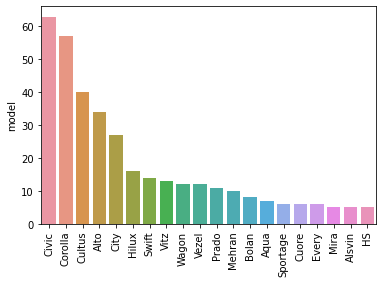

In [30]:
model_num = df['model'].value_counts()[:20]
print("graph for %s: total = %d" % ('model', len(model_num)))
chart = sns.barplot(x=model_num.index, y=model_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

civic make is Honda ... Interesting

In [31]:
df.columns

Index(['title', 'make', 'model', 'year', 'mileagekm', 'location', 'fueltype',
       'registeredcity', 'color', 'enginecapacitycc', 'assembly', 'automatic',
       'pricePKR', 'VXR', 'VXL'],
      dtype='object')

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [33]:
pd.pivot_table(df, index = 'make' , values = 'pricePKR',aggfunc = 'count')

,pricePKR
make,
Audi,2
Changan,7
Daihatsu,15
FAW,2
Honda,110
Hyundai,3
KIA,11
MG,5
Mazda,1


In [34]:
pd.pivot_table(df, index = 'make' , values = 'pricePKR', columns = 'assembly' ,aggfunc = 'count')

assembly,Imported,local,unknownAssembly
make,,,
Audi,NaN,2.0,NaN
Changan,NaN,7.0,NaN
Daihatsu,4.0,3.0,8.0
FAW,NaN,1.0,1.0
Honda,16.0,70.0,24.0
Hyundai,NaN,2.0,1.0
KIA,2.0,8.0,1.0
MG,3.0,2.0,NaN
Mazda,NaN,NaN,1.0


In [35]:
df

,title,make,model,year,mileagekm,location,fueltype,registeredcity,color,enginecapacitycc,assembly,automatic,pricePKR,VXR,VXL
0,Toyota Corolla SE Saloon Automatic 2004,Toyota,Corolla,2004,186000,Husaini chowk Ranger market hasil pur road,Petrol,Karachi,White,1600,local,automatic,120000,0,0
1,Toyota Corolla Altis Grande CVT-i 1.8 2016,Toyota,Corolla,2016,159000,unknownLocation,Petrol,Punjab,White,1800,local,automatic,310000,0,0
2,Toyota Raize 2021,Toyota,Raize,2021,1700,189-B PakArab Society Ferozpur Road15-A Moulan...,Petrol,Un-Registered,Red,1000,Imported,automatic,439500,0,0
3,Honda Civic VTi Oriel 1.6 2004,Honda,Civic,2004,285000,unknownLocation,Petrol,Sialkot,Grey,1600,local,unknown,137500,0,0
4,Toyota Vitz F 1.0 2018,Toyota,Vitz,2018,38000,Hockey Stadium Near Gourmet Bakery,Petrol,Lahore,White,1000,local,automatic,275000,0,0
5,Honda Vezel Hybrid Z Honda Sensing 2015,Honda,Vezel,2015,80000,"New M.A jinnah road, karachi, sindh, pakistan",Petrol,Karachi,White,1500,Imported,automatic,395000,0,0
6,Suzuki Bolan 2021,Suzuki,Bolan,2021,14000,unknownLocation,Petrol,Islamabad,White,1000,local,unknown,127000,0,0
7,Honda Civic VTi Oriel Automatic 1.6 2000,Honda,Civic,2000,257000,unknownLocation,Petrol,Islamabad,Grey,1600,local,automatic,114500,0,0
8,Suzuki Cultus EURO II 2014,Suzuki,Cultus,2014,58750,unknownLocation,Petrol,Karachi,Grey,1000,local,unknown,115000,0,0
9,Toyota Corolla GLi 1.3 2002,Toyota,Corolla,2002,110000,unknownLocation,CompressedNaturalGas,Islamabad,Silver,1300,local,unknown,149000,0,0


In [36]:
df.to_csv('data_edaclean.csv',index = False)